In [90]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy

In [123]:
nlp=spacy.load("en_core_web_sm")
tfIdf=TfidfVectorizer(stop_words='english', min_df=.1, max_df=.5) 
cv=CountVectorizer(stop_words='english',min_df=.1, max_df=.5)

In [124]:
df=pd.read_csv('./Data/childrens_books.csv')

In [127]:
df.head()

,Ranking,Title,Author,Year,Rating,Description
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young..."
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,The Very Hungry Caterpillar tells the story of...
2,3,The Giving Tree,Shel Silverstein,1964,4.38,The Giving Tree is a touching and bittersweet ...
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convi..."
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime s..."


In [129]:
def sentence_lower(series):
    output=series.str.lower()
    output=output.str.replace(r'\[.*?\]', '', regex=True)
    # remove puntuations
    output=output.str.replace(r'[^\w\s]', '', regex=True)
    return output

In [131]:
def llemma_text(series):
    doc=nlp(series)
    output =[token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(output)

In [150]:
def filter_pos(text,list_parts=['NOUN', 'VERB']):
    doc=nlp(text)
    pos=[token.text for token in doc if token.pos_ in list_parts]
    return ' '.join(pos)
   

In [152]:
df['Clean_Description'] = sentence_lower(df.Description).apply(llemma_text).apply(filter_pos)

In [154]:
df.head()

,Ranking,Title,Author,Year,Rating,Description,Clean_Description
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young...",thing follow boy send room misbehave fill crea...
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,The Very Hungry Caterpillar tells the story of...,caterpillar tell story caterpillar eat variety...
2,3,The Giving Tree,Shel Silverstein,1964,4.38,The Giving Tree is a touching and bittersweet ...,giving tree touching story tree give boy cours...
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convi...",try convince character try dish egg ham resist...
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime s...",moon bedtime story bunny say goodnight room mo...


In [156]:
tdf=tfIdf.fit_transform(df.Clean_Description)
df_tdf=pd.DataFrame(tdf.toarray(),columns= tfIdf.get_feature_names_out())

In [158]:
df_tdf

,adventure,boy,character,courage,engage,explore,family,follow,friendship,fun,...,read,reader,series,teach,tell,text,theme,timeless,way,world
0,0.342381,0.492926,0.0000,0.000000,0.0,0.352484,0.0,0.357783,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.342381,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.344967,0.0,0.000000,0.432715,0.596161,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.738072,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.369036,0.256328,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.5297,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.58078,...,0.518817,0.336067,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
96,0.000000,0.000000,0.0000,0.000000,0.0,0.393707,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.524743,0.000000,0.000000
97,0.000000,0.000000,0.0000,0.000000,0.0,0.444594,0.0,0.000000,0.514498,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.431850,0.000000,0.000000,0.592566
98,0.387427,0.000000,0.0000,0.572417,0.0,0.398860,0.0,0.000000,0.461574,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.387427,0.000000,0.000000,0.000000


In [160]:
df_cv=cv.fit_transform(df.Clean_Description)
cv_df=pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names_out())

In [162]:
cv_df

,adventure,boy,character,courage,engage,explore,family,follow,friendship,fun,...,read,reader,series,teach,tell,text,theme,timeless,way,world
0,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
98,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


<Axes: >

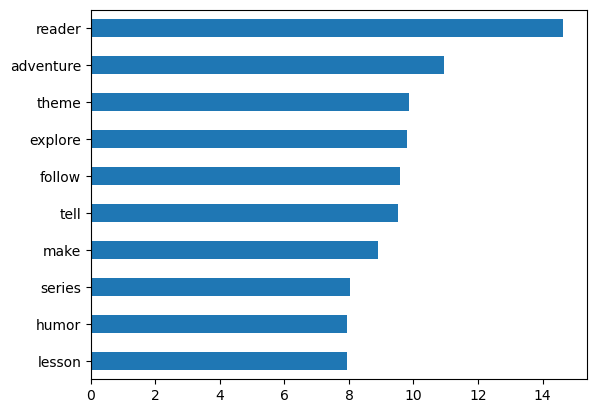

In [164]:
df_tdf.sum().sort_values().tail(10).plot(kind='barh')


<Axes: >

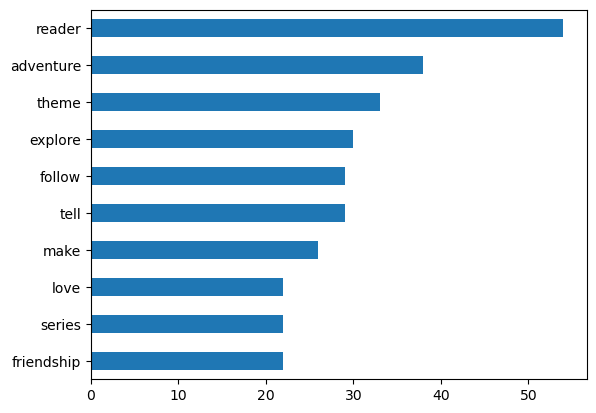

In [166]:
cv_df.sum().sort_values().tail(10).plot(kind='barh')